**CodeAlpha Task 1**

**Titanic Classification by ABU BAKAR SIDDIQ**

**Titanic Classification
Make a system which tells whether the person will
be save from sinking. What factors were most likely
lead to success-socio-economic status, age, gender
and more.**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

**Loading Train-Test DataSets**

In [70]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

**Discovering Dataset**

In [71]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Visualizing Missing Values**

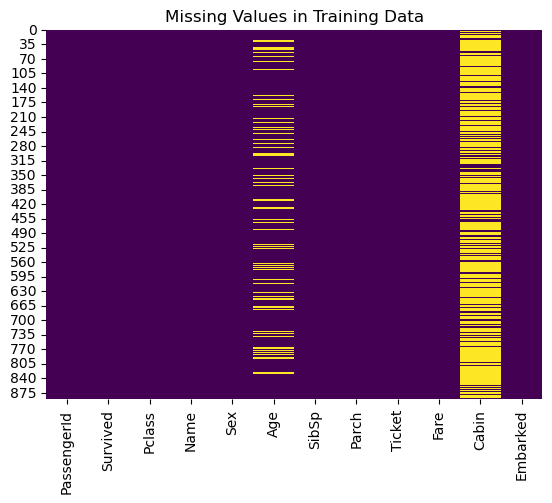

In [74]:
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Training Data')
plt.show()

**Visualizing Survival Rate by Pclass**

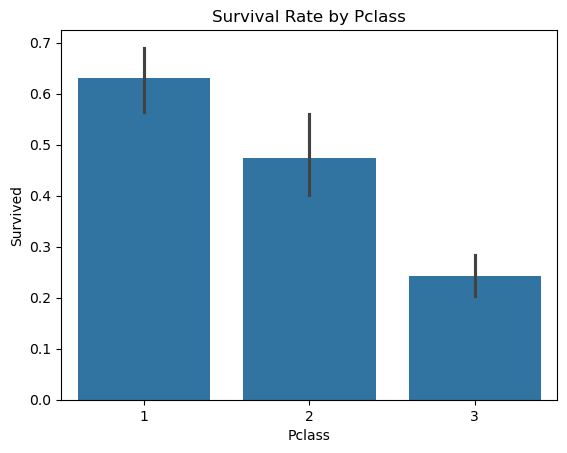

In [75]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pclass')
plt.show()

**Visualizing Survival Rate by Sex**

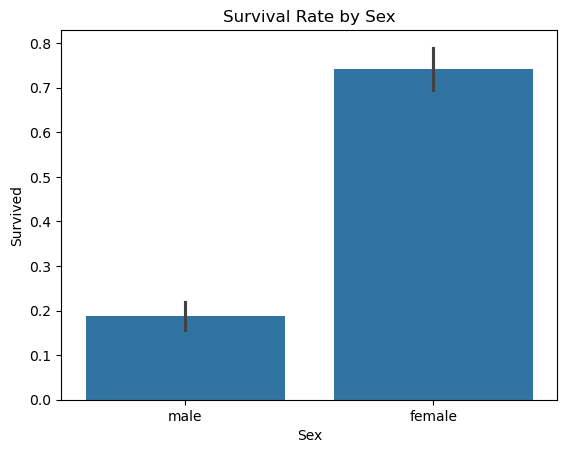

In [76]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.show()

**Visualizing Age Distribution**

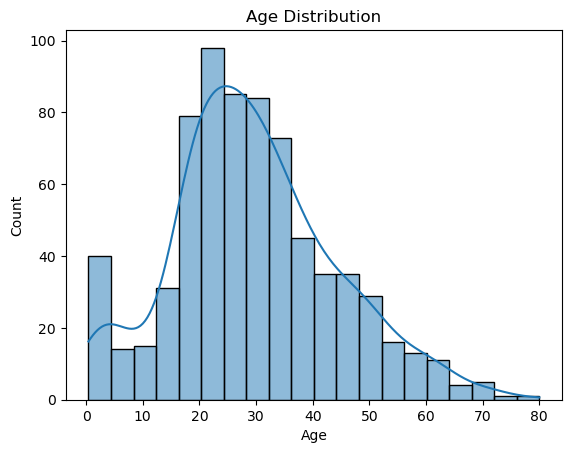

In [77]:
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

**Visualize Survival Rate by Age**

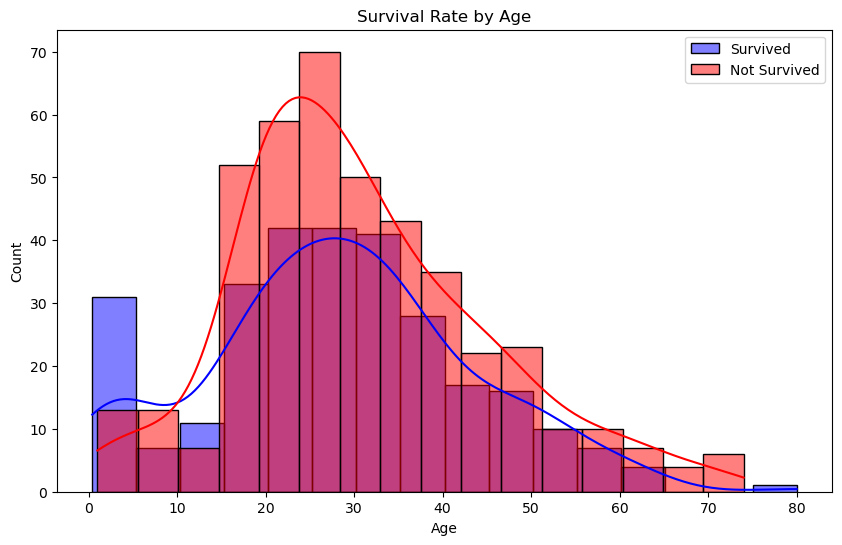

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df[train_df['Survived'] == 1]['Age'].dropna(), kde=True, color='blue', label='Survived')
sns.histplot(train_df[train_df['Survived'] == 0]['Age'].dropna(), kde=True, color='red', label='Not Survived')
plt.title('Survival Rate by Age')
plt.legend()
plt.show()

**Visualize survival rate by Embarked**

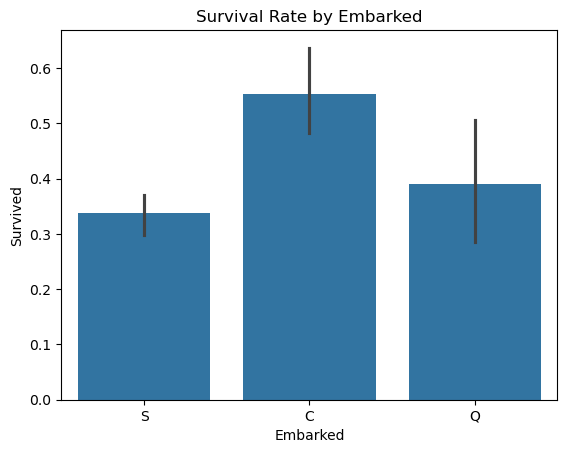

In [79]:
sns.barplot(x='Embarked', y='Survived', data=train_df)
plt.title('Survival Rate by Embarked')
plt.show()

**Filling Missing Values, Extracting & Replacing Titles from Names, Training & Validation Split**

In [80]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

train_df['Title'] = train_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

title_replacement = {
    'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 'Master': 'Master',
    'Don': 'Rare', 'Rev': 'Rare', 'Dr': 'Rare', 'Mme': 'Mrs', 'Ms': 'Miss',
    'Major': 'Rare', 'Lady': 'Rare', 'Sir': 'Rare', 'Mlle': 'Miss',
    'Col': 'Rare', 'Capt': 'Rare', 'Countess': 'Rare', 'Jonkheer': 'Rare',
    'Dona': 'Rare'
}
train_df['Title'] = train_df['Title'].replace(title_replacement)
test_df['Title'] = test_df['Title'].replace(title_replacement)

train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

X = train_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_df['Survived']
X_test = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')

X_test = X_test.reindex(columns=X.columns, fill_value=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

**Training Logistic Regression Model**

In [81]:
log_reg = LogisticRegression(max_iter=300, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_val)
log_reg_accuracy = accuracy_score(y_val, y_pred_log_reg)
log_reg_classification_report = classification_report(y_val, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"Logistic Regression Classification Report:\n{log_reg_classification_report}")

Logistic Regression Accuracy: 0.7988826815642458
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Training Random Forest model**

In [82]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_val)
rf_accuracy = accuracy_score(y_val, y_pred_rf)
rf_classification_report = classification_report(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Random Forest Classification Report:\n{rf_classification_report}")

Random Forest Accuracy: 0.8268156424581006
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



**Training Gradient Booting model**

In [83]:
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_val)
gb_accuracy = accuracy_score(y_val, y_pred_gb)
gb_classification_report = classification_report(y_val, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy}")
print(f"Gradient Boosting Classification Report:\n{gb_classification_report}")

Gradient Boosting Accuracy: 0.8379888268156425
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



**Choosing the Best Model for Predictions as per User-Input (Gradient Boosting in this Case)**

In [84]:
final_model = gb_clf

y_pred_test = final_model.predict(X_test)

submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred_test})
submission.to_csv('submission.csv', index=False)

print("Training columns:", X.columns)
print("Test columns:", X_test.columns)

Training columns: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')
Test columns: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')


**Displaying the First Few Rows of the DataFrame to check the Predictions**

In [85]:
results_df = pd.DataFrame({'Actual': y_val.reset_index(drop=True), 'Predicted': y_pred_rf})

results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

print("Sample of Results DataFrame:")
print(results_df.head())

Sample of Results DataFrame:
   Actual  Predicted  Correct
0       1          1     True
1       0          0     True
2       0          0     True
3       1          1     True
4       1          0    False


**Displaying Total Counts of Correct vs Incorrect Predictions(True/False Predictions)**

In [86]:
print("\nCounts of Correct vs Incorrect Predictions:")
print(results_df['Correct'].value_counts())


Counts of Correct vs Incorrect Predictions:
Correct
True     148
False     31
Name: count, dtype: int64


**Plotting Correct vs Incorrect Predictions**

C:\Users\HP\AppData\Local\Temp\ipykernel_6644\171632666.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Correct', data=results_df, palette='viridis', order=[True, False])


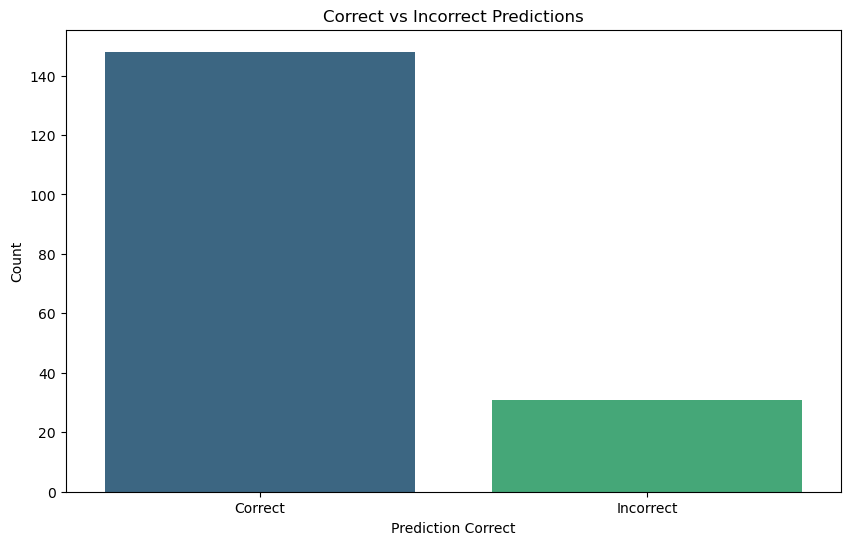

In [87]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Correct', data=results_df, palette='viridis', order=[True, False])
plt.title('Correct vs Incorrect Predictions')
plt.xlabel('Prediction Correct')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Correct', 'Incorrect'])
plt.show()

**Based on User-Input Model Will Predict by its Own from it's Training**

In [88]:
def predict_survival():
    embarked = input("Enter Embarked (C, Q, or S): ").strip().upper()
    sex = input("Enter Gender (male/female): ").strip().lower()
    title = input("Enter Title (Mr, Mrs, Miss, etc.): ").strip().lower()
    
    user_data = pd.DataFrame([{
        'Pclass': int(input("Enter Passenger Class (1, 2, or 3): ")),
        'Age': float(input("Enter Age: ")),
        'Fare': float(input("Enter Fare: ")),
        'Sex_male': 1 if sex == 'male' else 0,
        'Embarked_C': 1 if embarked == 'C' else 0,
        'Embarked_Q': 1 if embarked == 'Q' else 0,
        'Title_Mr': 1 if title == 'mr' else 0,
        'Title_Mrs': 1 if title == 'mrs' else 0,
        'Title_Miss': 1 if title == 'miss' else 0,
        'Title_Rare': 1 if title not in ['mr', 'mrs', 'miss', 'master'] else 0  # Adjust as needed for other titles
    }])
    
    # Align the user data columns with the model's expected input
    user_data = user_data.reindex(columns=X.columns, fill_value=0)
    
    # Predict survival
    prediction = final_model.predict(user_data)
    
    # Output result
    if prediction[0] == 1:
        print("The passenger is predicted to survive.")
    else:
        print("The passenger is predicted not to survive.")

# Call the function to get predictions based on user input
predict_survival()

Enter Embarked (C, Q, or S):  s
Enter Gender (male/female):  f
Enter Title (Mr, Mrs, Miss, etc.):  etv
Enter Passenger Class (1, 2, or 3):  1
Enter Age:  23
Enter Fare:  23


The passenger is predicted to survive.
